IMPORTING LIBRARIES

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

IMPORTING DATASET

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


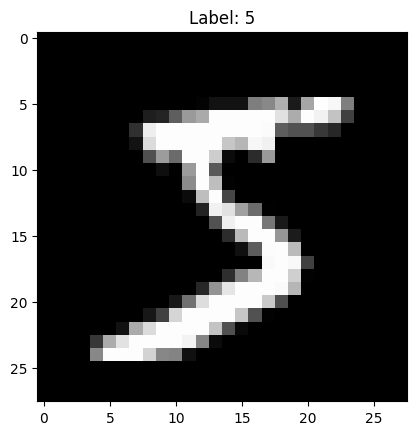

In [74]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

APPLYING ONE HOT ENCODING

In [75]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

APPLYING FEATURE SCALING

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train = sc.fit_transform(x_train_flat)
x_test = sc.transform(x_test_flat)

INITIALISING THE ANN MODEL

In [77]:
ann = tf.keras.models.Sequential()

FIRST HIDDEN LAYER

In [78]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

SECOND HIDDEN LAYER

In [79]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

OUTPUT LAYER

In [80]:
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

TRAINING THE ANN MODEL

COMPILING THE ANN MODEL

In [81]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
ann.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8893 - loss: 0.3769 - val_accuracy: 0.9585 - val_loss: 0.1537
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9697 - loss: 0.0962 - val_accuracy: 0.9624 - val_loss: 0.1324
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9791 - loss: 0.0660 - val_accuracy: 0.9680 - val_loss: 0.1238
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0465 - val_accuracy: 0.9664 - val_loss: 0.1315
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9886 - loss: 0.0381 - val_accuracy: 0.9692 - val_loss: 0.1524
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9895 - loss: 0.0352 - val_accuracy: 0.9698 - val_loss: 0.1805
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9921 - loss: 0.0256 - val_accuracy: 0.9706 - val_loss: 0.1688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0273

PREDICTING THE TEST SET RESULT

In [83]:
y_predict = ann.predict(x_test)

y_test_labels = np.argmax(y_test, axis=1)


y_predict_labels = np.argmax(y_predict, axis=1)


print(np.concatenate((y_predict_labels.reshape(len(y_predict_labels),1), y_test_labels.reshape(len(y_test_labels),1)),1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]


CONFUSION MATRIX

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_labels, y_predict_labels)
print(cm)
accuracy_score(y_test_labels, y_predict_labels)

[[ 971    0    0    4    0    1    3    0    1    0]
 [   0 1122    1    2    0    2    3    1    4    0]
 [   3    4  998   11    1    2    1    7    5    0]
 [   0    0    2  992    0    6    0    2    4    4]
 [   1    2    7    1  952    2    3    1    3   10]
 [   2    0    0   13    1  868    1    0    6    1]
 [   4    2    1    1    4    9  933    0    4    0]
 [   1    8   10    4    5    0    0  982    4   14]
 [   1    0    3    7    2    2    1    4  950    4]
 [   3    3    1    7   17    6    0    8    5  959]]


0.9727